# **Projet apprentissage statistique**
Sujet 4
Base de données utilisée: creditcard.csv (KAGGLE)

# A. Introduction

Voir le compte rendu pdf.

#B. Implémentation des différentes méthodes de resampling

## I.Importation package et données, séparation des données





In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from scipy import stats 
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

In [5]:
import seaborn as sns
sns.set_style('whitegrid')

Nous importons notre base de données

In [6]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

df.shape

(284807, 31)

In [15]:
X = df.iloc[:, :-1].values #on regroupe les features uniquement dans X
y = df.iloc[:, -1].values #on regroupe les labels uniquement dans y

#on place 80% de nos données dans l'ensemble d'entrainement et 20% dans l'ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#On initialise les tableau des résultats 

resultats_lr = pd.DataFrame(columns = ['Accuracy Score', 
                                 'ROC AUC Score','F1-Score'], 
                      index = ['Sans resampling', 
                               'Random Undersampling', 
                               'Random Oversampling','SMOTE'])
resultats_knn = pd.DataFrame(columns = ['Accuracy Score', 
                                 'ROC AUC Score','F1-Score'], 
                      index = ['Sans resampling', 
                               'Random Undersampling', 
                               'Random Oversampling','SMOTE'])
resultats_cnb = pd.DataFrame(columns = ['Accuracy Score', 
                                 'ROC AUC Score','F1-Score'], 
                      index = ['Sans resampling', 
                               'Random Undersampling', 
                               'Random Oversampling','SMOTE'])


## II.Modèles de référence sans resampling

### a) Régression logistique

Nous commenterons le code pour la régression logistique; le procédé étant le même pour les autres méthodes de régression nous commenterons les autres codes que lorsque nous introduirons des concepts ou procédés nouveaux.

In [16]:
Reg_log = LogisticRegression(random_state = 0) #on définit le modèle de regression logisitique 
Reg_log.fit(X_train, y_train) #on l'entraine avec notre ensemble d'entrainement sans resampling

y_pred_lr = Reg_log.predict(X_test) #on teste notre modèle sur notre ensemble de test
y_prob_lr=Reg_log.predict_proba(X_test)[::,1] # On calcule notre vecteur de proba prédite pour la fonction roc_curve

a_lr = accuracy_score(y_test, y_pred_lr)  #on calcule notre accuracy
b_lr = roc_auc_score(y_test, y_prob_lr)#on calcule notre roc auc 
c_lr = f1_score(y_test, y_pred_lr)#on calcule notre f1-score
resultats_lr.loc['Sans resampling'] = [a_lr,b_lr,c_lr] #on enregistre notre accuracy et notre ROC AUC pour pouvoir les comparer ensuite

lr_fpr, lr_tpr, lr_thresold = roc_curve(y_test, y_prob_lr)

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_lr)) #on calcule notre matrice de confusion entre les valeurs prédites et les valeurs réelles
print("Accuracy = ", a_lr)
print("ROC AUC = ", b_lr) 


Matrice de confusion 
 [[56834    27]
 [   36    65]]
Accuracy =  0.9988939995084443
ROC AUC =  0.926118425669267


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### b) K-plus proches voisins

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter de les executer.**

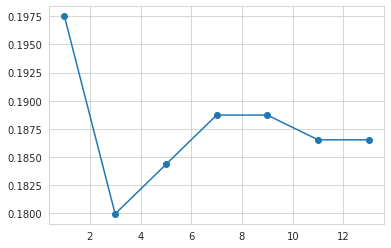

In [14]:
#Choix du du k optimal en minimisant les erreurs de prédiction
errors = []# on initialise la liste d'erreurs
for k in range(1,15,2):
    X_entrain, X_validation, y_entrain, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)#on sépare le train set en un ensenmpble d'entrainement et un ensemble de validation
    knn = KNeighborsClassifier(n_neighbors =k)# on choisit le model à k voisins
    errors.append(100*(1 - knn.fit(X_entrain, y_entrain).score(X_validation, y_validation))) # nous calculons l'erreur de prediction et nous l'ajoutons à la liste des erreurs
plt.plot(range(1,15,2), errors, 'o-')
plt.show()



Nous choisissons de nous limiter à 3 voisins pour la régression avec la méthode des k-plus proches voisins

In [50]:
#Même procédé que pour la régression logistique
classifier_knn = KNeighborsClassifier(n_neighbors = 3)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred_knn = classifier_knn.predict(X_test)
y_prob_knn=classifier_knn.predict_proba(X_test)[::,1] 

a_knn = accuracy_score(y_test, y_pred_knn)
b_knn = roc_auc_score(y_test, y_prob_knn)
c_knn = f1_score(y_test, y_pred_knn)

resultats_knn.loc['Sans resampling'] = [a_knn,b_knn,c_knn]

knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, y_prob_knn)

print("Matrice de confusion","\n",  confusion_matrix(y_test, y_pred_knn))
print("Accuracy = ", a_knn)
print("ROC AUC = ", b_knn)

Matrice de confusion 
 [[56859     2]
 [   93     8]]
Accuracy =  0.9983322214809873
ROC AUC =  0.5685685485240106


### c) Classification Naive bayséienne





In [31]:
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [32]:
y_pred_cnb = classifier_nb.predict(X_test)
y_prob_cnb=classifier_nb.predict_proba(X_test)[::,1] 

a_cnb = accuracy_score(y_test, y_pred_cnb)
b_cnb = roc_auc_score(y_test, y_prob_cnb)
c_cnb = f1_score(y_test, y_pred_cnb)

resultats_cnb.loc['Sans resampling'] = [a_cnb,b_cnb,c_cnb]

cnb_fpr, cnb_tpr, cnb_thresold = roc_curve(y_test, y_prob_cnb)
print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_cnb))
print("Accuracy = ", a_cnb)
print("ROC AUC = ", b_cnb)

Matrice de confusion 
 [[56479   382]
 [   39    62]]
Accuracy =  0.9926091078262701
ROC AUC =  0.9780630584118541


## III.Méthode d'undersampling

In [9]:


r_undersamp = RandomUnderSampler(random_state = 2) #On appelle notre fonction qui va nous permettre d'appliquer la méthode de Random Undersampling 

X_rus, y_rus = r_undersamp.fit_resample(X_train, y_train) #on applique le random Undersampling à notre ensemble d'entrainement

### a) Régression logistique

In [36]:
Reg_log_random_us = LogisticRegression(random_state = 0) #on définit le modèle de regression logisitique
Reg_log_random_us.fit(X_rus, y_rus) #on l'entraine avec notre ensemble d'entrainement avec RUS

LogisticRegression(random_state=0)

In [37]:
#même principe que pour la méthode sans RUS

y_pred_lr_rus = Reg_log_random_us.predict(X_test)
y_prob_lr_rus=Reg_log_random_us.predict_proba(X_test)[::,1] 

a_lr_rus = accuracy_score(y_test, y_pred_lr_rus)
b_lr_rus= roc_auc_score(y_test, y_prob_lr_rus)
c_lr_rus = f1_score(y_test, y_pred_lr_rus)

resultats_lr.loc['Random Undersampling'] = [a_lr_rus,b_lr_rus,c_lr_rus]

lr_aus_fpr, lr_aus_tpr, lr_aus_thresold = roc_curve(y_test, y_prob_lr_rus)
print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_lr_rus))
print( "Accuracy = ", a_lr_rus)
print( "ROC AUC = ", b_lr_rus)

Matrice de confusion 
 [[54327  2534]
 [    7    94]]
Accuracy =  0.9553913135072505
ROC AUC =  0.9732802468970274


### b) K-plus proches voisins

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter des les executer.**

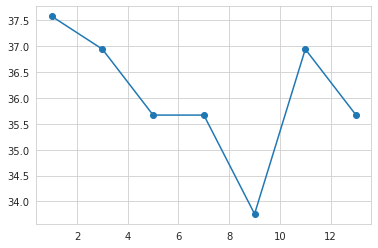

In [11]:
#Choix du du k optimal
errors = []
for k in range(1,15,2):
    X_entrain, X_validation, y_entrain, y_validation = train_test_split(X_rus, y_rus, test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors =k)
    errors.append(100*(1 - knn.fit(X_entrain, y_entrain).score(X_validation, y_validation)))
plt.plot(range(1,15,2), errors, 'o-')
plt.show()


Nous choisissons 9 voisins pour knn

In [17]:
classifier_knn_rus = KNeighborsClassifier(n_neighbors = 9)
classifier_knn_rus.fit(X_rus, y_rus)

KNeighborsClassifier(n_neighbors=9)

In [18]:
y_pred_knn_rus = classifier_knn_rus.predict(X_test)
y_prob_knn_rus=classifier_knn_rus.predict_proba(X_test)[::,1] 

a_knn_rus = accuracy_score(y_test, y_pred_knn_rus)
b_knn_rus = roc_auc_score(y_test, y_prob_knn_rus)
c_knn_rus = f1_score(y_test, y_pred_knn_rus)

resultats_knn.loc['Random Undersampling'] = [a_knn_rus,b_knn_rus,c_knn_rus]

knn_aus_fpr, knn_aus_tpr, knn_aus_thresold = roc_curve(y_test, y_prob_knn_rus)
print("Matrice de confusion","\n", confusion_matrix(y_test, y_pred_knn_rus))
print("Accuracy = ", a_knn_rus)
print("ROC AUC = ", b_knn_rus)

Matrice de confusion 
 [[39470 17391]
 [   43    58]]
Accuracy =  0.6939363084161371
ROC AUC =  0.6670612076244293


###c) Classification naive Bayesienne

In [19]:
classifier_nb_rus = GaussianNB()
classifier_nb_rus.fit(X_rus, y_rus)

GaussianNB()

In [20]:
y_pred_cnb_rus = classifier_nb_rus.predict(X_test)
y_prob_cnb_rus=classifier_nb_rus.predict_proba(X_test)[::,1] 

a_cnb_rus = accuracy_score(y_test, y_pred_cnb_rus)
b_cnb_rus = roc_auc_score(y_test, y_prob_cnb_rus)
c_cnb_rus = f1_score(y_test, y_pred_cnb_rus)

resultats_cnb.loc['Random Undersampling'] = [a_cnb_rus,b_cnb_rus,c_cnb_rus]

cnb_aus_fpr, cnb_aus_tpr, cnb_aus_thresold = roc_curve(y_test, y_prob_cnb_rus)
print("Matrice de confusion","\n", confusion_matrix(y_test, y_pred_cnb_rus))
print("Accuracy = ", a_cnb_rus)
print("ROC AUC = ", b_cnb_rus)

Matrice de confusion 
 [[55991   870]
 [   32    69]]
Accuracy =  0.9841648818510585
ROC AUC =  0.9777024430428832


## IV. Méthodes d'oversampling

### 1. RandomOverSampling

In [21]:
# Resample la classe minoritaire.
ros = RandomOverSampler(random_state=0)
# On entraine le modèle de resampling sur notre jeu de données
ros_trainX,ros_trainY = ros.fit_resample(X, y)


#### a) Régression logistique

In [22]:
#entrainement de l'algo de régression logistique
lr_ros=LogisticRegression()
lr_ros.fit(ros_trainX, ros_trainY )

#AU_ROC, metrics
y_pred_lr_ros = lr_ros.predict(X_test)
y_prob_lr_ros=lr_ros.predict_proba(X_test)[::,1] 

lr_ros_fpr, lr_ros_tpr, lr_ros_thresold = roc_curve(y_test, y_prob_lr_ros)

a_lr_ros = accuracy_score(y_test, y_pred_lr_ros)
b_lr_ros = roc_auc_score(y_test, y_prob_lr_ros)
c_lr_ros= f1_score(y_test, y_pred_lr_ros)


resultats_lr.loc['Random Oversampling'] = [a_lr_ros,b_lr_ros,c_lr_ros]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_lr_ros))
print( "Accuracy = ", a_lr_ros)
print( "ROC AUC = ", b_lr_ros)

Matrice de confusion 
 [[54936  1925]
 [    5    96]]
Accuracy =  0.9661177627190056
ROC AUC =  0.9837991238317656


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


####b) K-plus proches voisins

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter des les executer.**

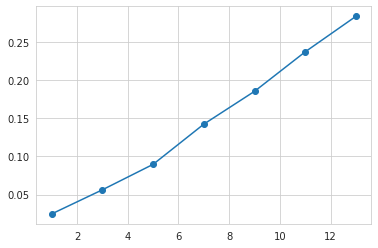

In [23]:
#Choix du du k optimal
errors = []
for k in range(1,15,2):
    X_entrain, X_validation, y_entrain, y_validation = train_test_split(ros_trainX,ros_trainY , test_size = 0.2, random_state = 0)
    knn = KNeighborsClassifier(n_neighbors =k)
    errors.append(100*(1 - knn.fit(X_entrain, y_entrain).score(X_validation, y_validation)))
plt.plot(range(1,15,2), errors, 'o-')
plt.show()

Nous choisissons 1 voisin pour KNN

In [47]:
#entrainement de l'algo knn
knn_ros = KNeighborsClassifier(n_neighbors = 1)
knn_ros.fit(ros_trainX,ros_trainY)

KNeighborsClassifier(n_neighbors=1)

In [48]:

#AU_ROC, metrics

y_pred_knn_ros = knn_ros.predict(X_test)
y_prob_knn_ros=knn_ros.predict_proba(X_test)[::,1] 
knn_ros_fpr, knn_ros_tpr, knn_ros_thresold = roc_curve(y_test, y_prob_knn_ros)

a_knn_ros = accuracy_score(y_test, y_pred_knn_ros)
b_knn_ros = roc_auc_score(y_test, y_prob_knn_ros)
c_knn_ros = f1_score(y_test, y_pred_knn_ros)


resultats_knn.loc['Random Oversampling'] = [a_knn_ros,b_knn_ros,c_knn_ros]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_knn_ros))
print( "Accuracy = ", a_knn_ros)
print( "ROC AUC = ", b_knn_ros)

Matrice de confusion 
 [[56861     0]
 [    0   101]]
Accuracy =  1.0
ROC AUC =  1.0


####c) Classification naïve bayésienne

In [33]:
# Entrainepment de l'algorithme
classifier_nb_ros = GaussianNB()
classifier_nb_ros.fit(ros_trainX,ros_trainY)

GaussianNB()

In [34]:

#AU_ROC, metrics
y_pred_cnb_ros = classifier_nb_ros.predict(X_test)
y_prob_cnb_ros=classifier_nb_ros.predict_proba(X_test)[::,1] 
cnb_ros_fpr, cnb_ros_tpr, cnb_ros_thresold  = roc_curve(y_test, y_prob_cnb_ros)

a_cnb_ros = accuracy_score(y_test, y_pred_cnb_ros)
b_cnb_ros = roc_auc_score(y_test, y_prob_cnb_ros)
c_cnb_ros = f1_score(y_test, y_pred_cnb_ros)


resultats_cnb.loc['Random Oversampling'] = [a_cnb_ros,b_cnb_ros,c_cnb_ros]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_cnb_ros))
print( "Accuracy = ", a_cnb_ros)
print( "ROC AUC = ", b_cnb_ros)

Matrice de confusion 
 [[56359   502]
 [   31    70]]
Accuracy =  0.990642884730171
ROC AUC =  0.977928197666674


### 2. Algorithme SMOTE



#### a) Régression logistique

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter des les executer.**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


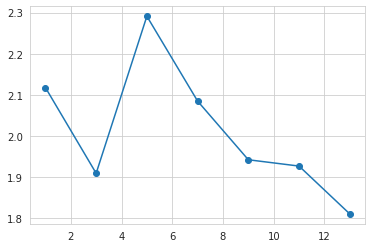

In [24]:
#Choix du  k optimal pour smote
errors = []
for k in range(1,15,2):
    X_entrain, X_validation, y_entrain, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
    sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=k)
    smote_trainX, smote_trainY = sm.fit_resample(X_entrain, y_entrain)
    lr_smote=LogisticRegression()
    lr_smote.fit(smote_trainX, smote_trainY )
    errors.append(100*(1 - lr_smote.fit(smote_trainX,smote_trainY).score(X_validation, y_validation)))
plt.plot(range(1,15,2), errors, 'o-')
plt.show()


In [52]:
# Resample la classe minoritaire. 
sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=13)

# On entraine le modèle de resampling sur notre jeu de données
smote_trainX, smote_trainY = sm.fit_resample(X_train, y_train)

In [53]:
#entrainement de l'algo de régression logistique
lr_smote=LogisticRegression()
lr_smote.fit(smote_trainX, smote_trainY )
#AU_ROC, metrics
y_pred_lr_smote = lr_smote.predict(X_test)
y_prob_lr_smote=lr_smote.predict_proba(X_test)[::,1] 
lr_smote_fpr, lr_smote_tpr, lr_smote_thresold  = roc_curve(y_test, y_prob_lr_smote)

a_lr_smote = accuracy_score(y_test, y_pred_lr_smote)
b_lr_smote = roc_auc_score(y_test, y_prob_lr_smote)
c_lr_smote= f1_score(y_test, y_pred_lr_smote)


resultats_lr.loc['SMOTE'] = [a_lr_smote,b_lr_smote,c_lr_smote]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_lr_smote))
print( "Accuracy = ", a_lr_smote)
print( "ROC AUC = ", b_lr_smote)

Matrice de confusion 
 [[55742  1119]
 [   11    90]]
Accuracy =  0.9801622134054282
ROC AUC =  0.9685276462786357


####b) K-plus proches voisins

Nous devons optimiser à la fois le nombre de voisins pour l'algorithme SMOTE mais aussi le nombre de voisins pour  la régression avec l'algorithme des k plus proches voisins.Dans la cellule qui suit, v est le nombre de voisins pour SMOTE et k le nombre de voisins pour KNN.

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter de les executer.**

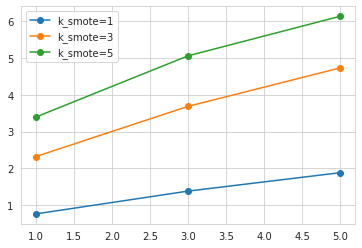

In [43]:
#Choix du  k optimal pour smote

for v in range(1,6,2):
  errors = []
  for k in range(1,6,2):
      X_entrain, X_validation, y_entrain, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
      sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=v)
      smote_trainX, smote_trainY = sm.fit_resample(X_entrain, y_entrain)
      knn_smote = KNeighborsClassifier(n_neighbors = k)
      knn_smote.fit(smote_trainX,smote_trainY)
      errors.append(100*(1 - knn_smote.fit(smote_trainX,smote_trainY).score(X_validation, y_validation)))
  plt.plot(range(1,6,2), errors, 'o-',label="k_smote="+str(v))
plt.legend()
plt.show()



Nous choisisons 1 voisin pour l'algorithme SMOTE et pour KNN

In [44]:
sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=1)
smote_trainX, smote_trainY = sm.fit_resample(X_train, y_train)

In [45]:
#entrainement de l'algo knn
knn_smote = KNeighborsClassifier(n_neighbors = 1)
knn_smote.fit(smote_trainX,smote_trainY)

KNeighborsClassifier(n_neighbors=1)

In [46]:

#AU_ROC,metrics
y_pred_knn_smote = knn_smote.predict(X_test)
y_prob_knn_smote=knn_smote.predict_proba(X_test)[::,1] 
knn_smote_fpr, knn_smote_tpr, knn_smote_thresold = roc_curve(y_test, y_prob_knn_smote)

a_knn_smote = accuracy_score(y_test, y_pred_knn_smote)
b_knn_smote = roc_auc_score(y_test, y_prob_knn_smote)
c_knn_smote = f1_score(y_test, y_pred_knn_smote)


resultats_knn.loc['SMOTE'] = [a_knn_smote,b_knn_smote,c_knn_smote]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_knn_smote))
print( "Accuracy = ", a_knn_smote)
print( "ROC AUC = ", b_knn_smote)

Matrice de confusion 
 [[56578   283]
 [   72    29]]
Accuracy =  0.9937677750079
ROC AUC =  0.6410758317878182


####c) Classification naïve bayésienne

**WARNING: Le temps d'execution des cellules ayant pour but d'optimiser un paramètre k est très long. Il vaut mieux éviter des les executer.**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


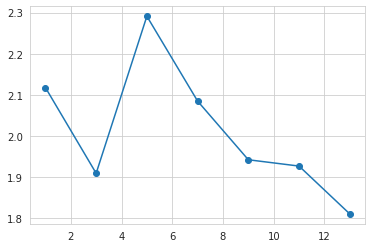

In [27]:
#Choix du  k optimal pour smote
errors = []
for k in range(1,15,2):
    X_entrain, X_validation, y_entrain, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
    sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=k)
    smote_trainX, smote_trainY = sm.fit_resample(X_entrain, y_entrain)
    classifier_nb_smote = GaussianNB()
    classifier_nb_smote.fit(smote_trainX,smote_trainY)
    errors.append(100*(1 - lr_smote.fit(smote_trainX,smote_trainY).score(X_validation, y_validation)))
plt.plot(range(1,15,2), errors, 'o-')
plt.show()



Nous choisissons 13 voisins pour l'algorithme SMOTE.

In [54]:
# Resample la classe minoritaire. 
sm = SMOTE(sampling_strategy='minority', random_state=0,k_neighbors=13)

# On entraine le modèle de resampling sur notre jeu de données
smote_trainX, smote_trainY = sm.fit_resample(X_train, y_train)

In [55]:
# Entrainement de l'algorithme
classifier_nb_smote = GaussianNB()
classifier_nb_smote.fit(smote_trainX,smote_trainY)

GaussianNB()

In [56]:

#AU_ROC, metrics
y_pred_cnb_smote = classifier_nb_smote.predict(X_test)
y_prob_cnb_smote=classifier_nb_smote.predict_proba(X_test)[::,1] 
cnb_smote_fpr, cnb_smote_tpr, cnb_smote_thresold  = roc_curve(y_test, y_prob_cnb_smote)

a_cnb_smote = accuracy_score(y_test, y_pred_cnb_smote)
b_cnb_smote = roc_auc_score(y_test, y_prob_cnb_smote)
c_cnb_smote = f1_score(y_test, y_pred_cnb_smote)


resultats_cnb.loc['SMOTE'] = [a_cnb_smote,b_cnb_smote,c_cnb_smote]

print("Matrice de confusion", "\n", confusion_matrix(y_test, y_pred_cnb_smote))
print( "Accuracy = ", a_cnb_smote)
print( "ROC AUC = ", b_cnb_smote)

Matrice de confusion 
 [[56461   400]
 [   27    74]]
Accuracy =  0.9925037744461219
ROC AUC =  0.9759526488165252


# C. Résultat et comparaison des méthodes

### a) Régression logistique

                     Accuracy Score ROC AUC Score  F1-Score
Sans resampling            0.998894      0.926118  0.673575
Random Undersampling       0.955391       0.97328   0.06889
Random Oversampling        0.966118      0.983799  0.090481
SMOTE                      0.980162      0.968528  0.137405


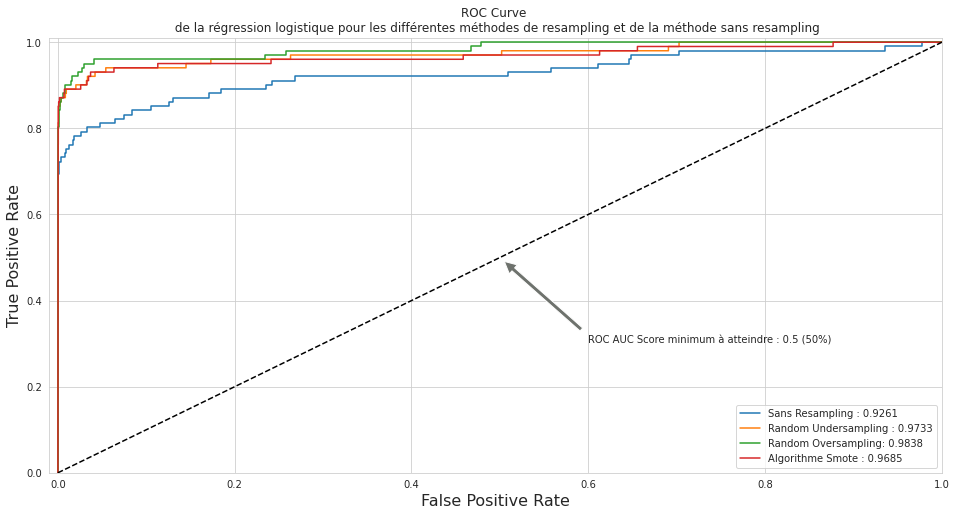

In [60]:
#On affiche le tableau de résultats
print(resultats_lr)

#D'abord on construit la fonction qui va nous permettre d'afficher la ROC Curve des différentes resampling pour la régression linéaire

def graph_roc_curve_multiple_lr(lr_fpr,lr_tpr,lr_aus_fpr, lr_aus_tpr, lr_ros_fpr, lr_ros_tpr, lr_smote_fpr, lr_smote_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n de la régression logistique pour les différentes méthodes de resampling et de la méthode sans resampling', fontsize=12)
    plt.plot(lr_fpr,lr_tpr, label='Sans Resampling : {:.4f}'.format(resultats_lr.loc['Sans resampling'][1]))
    plt.plot(lr_aus_fpr, lr_aus_tpr, label='Random Undersampling : {:.4f}'.format(resultats_lr.loc['Random Undersampling'][1]))
    plt.plot(lr_ros_fpr, lr_ros_tpr, label='Random Oversampling: {:.4f}'.format(resultats_lr.loc['Random Oversampling'][1]))
    plt.plot(lr_smote_fpr, lr_smote_tpr, label='Algorithme Smote : {:.4f}'.format(resultats_lr.loc['SMOTE'][1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC AUC Score minimum à atteindre : 0.5 (50%) ', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
# On appelle la fonction pour tracer le graphe
graph_roc_curve_multiple_lr(lr_fpr,lr_tpr,lr_aus_fpr, lr_aus_tpr, lr_ros_fpr, lr_ros_tpr, lr_smote_fpr, lr_smote_tpr)

### d) K-plus proches voisins

                     Accuracy Score ROC AUC Score  F1-Score
Sans resampling            0.998332      0.568569  0.144144
Random Undersampling       0.693936      0.667061   0.00661
Random Oversampling             1.0           1.0       1.0
SMOTE                      0.993768      0.641076  0.140436


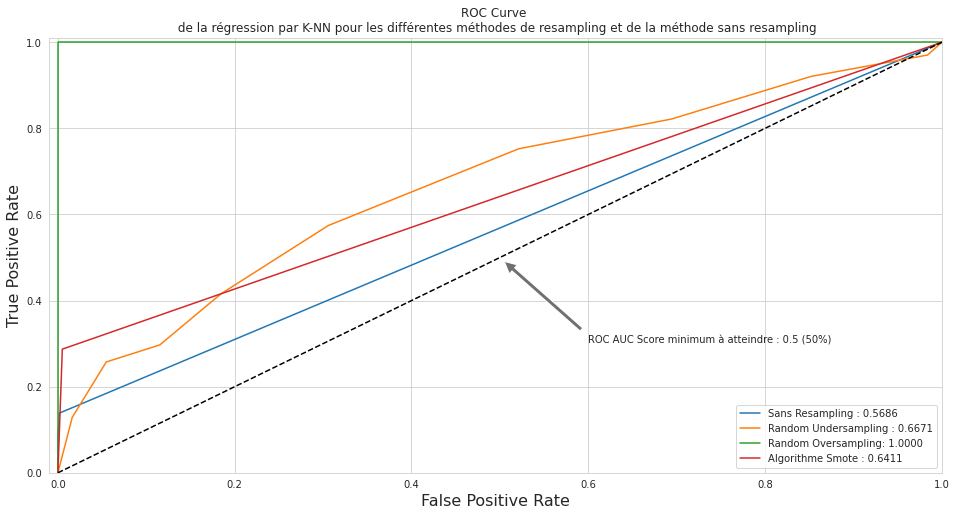

In [57]:
print(resultats_knn)
def graph_roc_curve_multiple_knn(knn_fpr,knn_tpr,knn_aus_fpr, knn_aus_tpr, knn_ros_fpr, knn_ros_tpr, knn_smote_fpr, knn_smote_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n de la régression par K-NN pour les différentes méthodes de resampling et de la méthode sans resampling', fontsize=12)
    plt.plot(knn_fpr,knn_tpr, label='Sans Resampling : {:.4f}'.format(resultats_knn.loc['Sans resampling'][1]))
    plt.plot(knn_aus_fpr, knn_aus_tpr, label='Random Undersampling : {:.4f}'.format(resultats_knn.loc['Random Undersampling'][1]))
    plt.plot(knn_ros_fpr, knn_ros_tpr, label='Random Oversampling: {:.4f}'.format(resultats_knn.loc['Random Oversampling'][1]))
    plt.plot(knn_smote_fpr, knn_smote_tpr, label='Algorithme Smote : {:.4f}'.format(resultats_knn.loc['SMOTE'][1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC AUC Score minimum à atteindre : 0.5 (50%) ', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple_knn(knn_fpr,knn_tpr,knn_aus_fpr, knn_aus_tpr, knn_ros_fpr, knn_ros_tpr, knn_smote_fpr, knn_smote_tpr)



### c) Classification Naïve Bayésienne

                     Accuracy Score ROC AUC Score  F1-Score
Sans resampling            0.992609      0.978063  0.227523
Random Undersampling       0.984165      0.977702  0.132692
Random Oversampling        0.990643      0.977928  0.208024
SMOTE                      0.992504      0.975953  0.257391


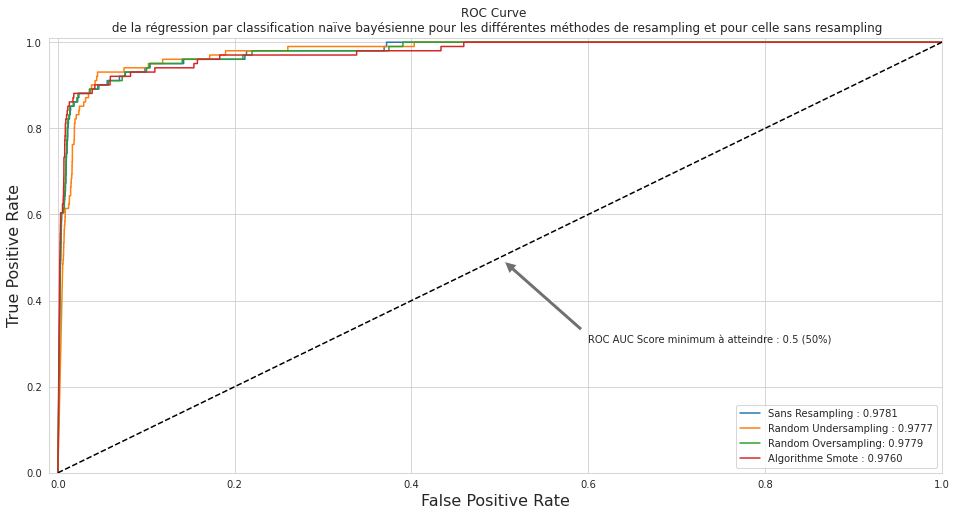

In [58]:
print(resultats_cnb)

def graph_roc_curve_multiple_cnb(cnb_fpr,cnb_tpr,cnb_aus_fpr, cnb_aus_tpr, cnb_ros_fpr, cnb_ros_tpr, cnb_smote_fpr, cnb_smote_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n de la régression par classification naïve bayésienne pour les différentes méthodes de resampling et pour celle sans resampling', fontsize=12)
    plt.plot(cnb_fpr,cnb_tpr, label='Sans Resampling : {:.4f}'.format(resultats_cnb.loc['Sans resampling'][1]))
    plt.plot(cnb_aus_fpr, cnb_aus_tpr, label='Random Undersampling : {:.4f}'.format(resultats_cnb.loc['Random Undersampling'][1]))
    plt.plot(cnb_ros_fpr, cnb_ros_tpr, label='Random Oversampling: {:.4f}'.format(resultats_cnb.loc['Random Oversampling'][1]))
    plt.plot(cnb_smote_fpr, cnb_smote_tpr, label='Algorithme Smote : {:.4f}'.format(resultats_cnb.loc['SMOTE'][1]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1.01])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC AUC Score minimum à atteindre : 0.5 (50%) ', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple_cnb(cnb_fpr,cnb_tpr,cnb_aus_fpr, cnb_aus_tpr, cnb_ros_fpr, cnb_ros_tpr, cnb_smote_fpr, cnb_smote_tpr)